In [23]:
import os, warnings 
import pandas as pd
from konlpy.tag import Okt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib

warnings.filterwarnings('ignore')
plt.style.use('ggplot')

font_location = 'C:/Windows/Fonts/HYCYSM.TTF'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font', family=font_name)

    1. 긍/부정 수 Count 해보고
    2. 파일별로 Count된거 그려보고
    3. 그 뒤에 형태소 분석 나누고 (Okt.pos)
    4. 긍/부정에 따른 언급량 많은 키워드만 뽑자.

    일단 파일 1개에 대해서만 진행해보고,
    다 되면 함수짜서 일괄로 그래프 그려보자. 이게 나을듯?

In [3]:
url = 'UseData/Voucher/Cleaned/'
sampleFile = os.listdir(url)[0]
df = pd.read_csv(url + sampleFile, index_col=0)
df

,별점,Contents,긍부정
0,5,칼로리도 낮고 맛있어요 간식으로 최고,1
1,5,단호박죽 너무 맛있어요 실온보관이라 편리하고 들고다니기도 좋네요 추천합니다,1
2,5,칼로리도 낮고 단호박도 달고 맛있네요!! 간편포장이라서 편리합니다,1
3,5,단호박 달고 맛있어요 칼로리도 낮아서 부담없이 참 좋습니다~~ 차게 먹으니 더 ...,1
4,5,맛도먹을만하구 재구매의사있습니다,1
...,...,...,...
1429,5,다이어트하는데 간식으로먹으려고샀어요! 제입맛에는 카카오보단 검은콩 단백질함량도...,1
1430,5,맛있어용 아침 식사 대용으로 굿굿,1
1431,5,적당히 달고 맛있어요 ! 더 사려구요,1
1432,5,계속 재구매해서 먹어요.,1


In [5]:
type(df['긍부정'])

pandas.core.series.Series

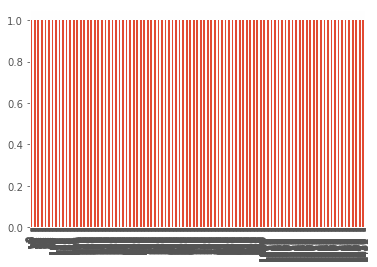

In [8]:
df['긍부정'].plot.bar(x=df['긍부정'])

In [18]:
df['별점'].value_counts(), df['긍부정'].value_counts()

(5    1236
 4     150
 3      39
 2       8
 1       1
 Name: 별점, dtype: int64, 1    1386
 0      48
 Name: 긍부정, dtype: int64)

Text(0.5, 1.0, '별점 별 빈도수')

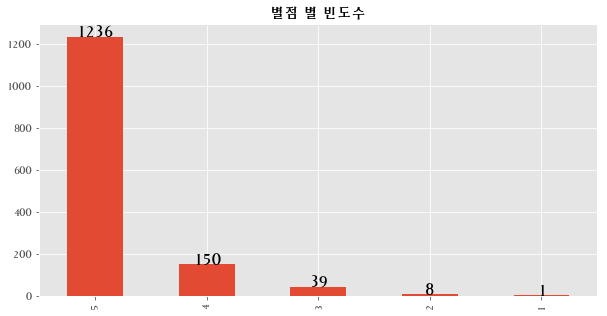

In [32]:
plt.figure(figsize=(10, 5))
df['별점'].value_counts().plot.bar()
for index, data in enumerate(df['별점'].value_counts()):
    plt.text(x=index, y=data, s=f'{data}', fontdict=dict(fontsize=15), ha='center')
plt.title('별점 별 빈도수')

Text(0.5, 0, '긍정:1, 부정:0')

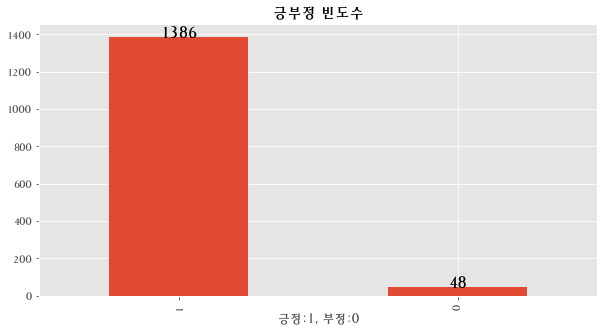

In [34]:
plt.figure(figsize=(10, 5))
df['긍부정'].value_counts().plot.bar()
for index, data in enumerate(df['긍부정'].value_counts()):
    plt.text(x=index, y=data, s=f'{data}', fontdict=dict(fontsize=15), ha='center')
plt.title('긍부정 빈도수')
plt.xlabel('긍정:1, 부정:0')

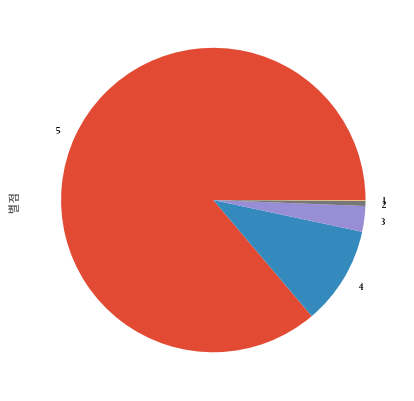

In [37]:
explode = (0, 0)
df['별점'].value_counts().plot.pie(figsize=(7,7))

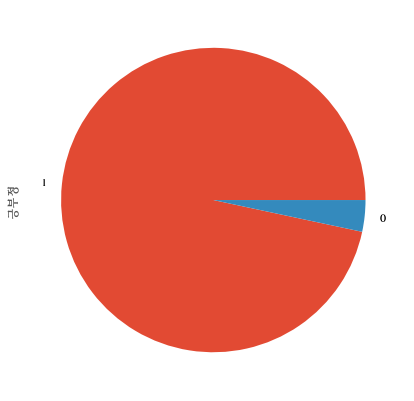

In [38]:
df['긍부정'].value_counts().plot.pie(figsize=(7,7))